In [1]:
import tensorflow as tf

In [41]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
data=keras.datasets.mnist

In [4]:
(train_image,train_label),(test_image,test_label)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_image.shape

(60000, 28, 28)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

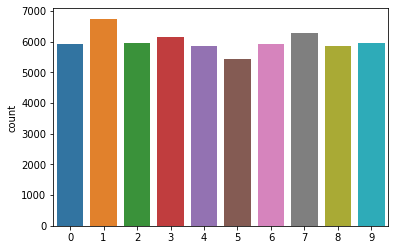

In [48]:
sns.countplot(train_label)

pd.Series(train_label).value_counts()
#All have almost same distribution. So no imbalanced dataset

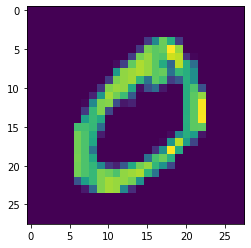

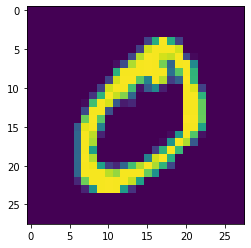

In [6]:
trainImg=train_image
trainImg=keras.utils.normalize(trainImg,axis=1)
plt.imshow(trainImg[1])
plt.show()
plt.imshow(train_image[1])

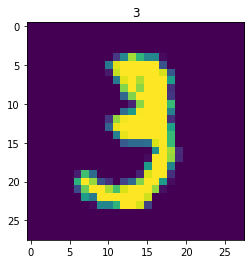

In [7]:
plt.imshow(train_image[10])
plt.title(train_label[10])
plt.show()

In [8]:
train_image[0].size

784

In [9]:
ctrain_image=train_image/255
ctest_image=test_image/255

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(ctrain_image,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1144 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0780 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0595 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9857


In [13]:
model.evaluate(ctest_image,test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9759


[0.07842442393302917, 0.9758999943733215]

In [14]:
predictions=model.predict(ctest_image)

In [15]:
(predictions[0])

array([2.1587664e-06, 1.5075923e-08, 6.2171581e-05, 2.6729465e-05,
       5.3209871e-11, 9.0601215e-09, 4.3570069e-12, 9.9990761e-01,
       7.5302729e-08, 1.1957184e-06], dtype=float32)

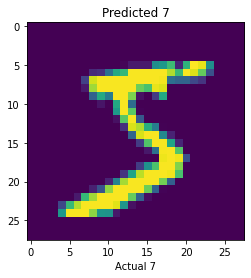

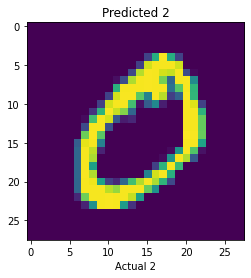

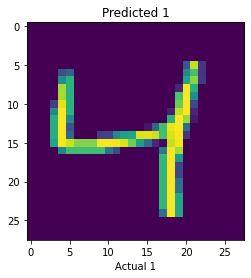

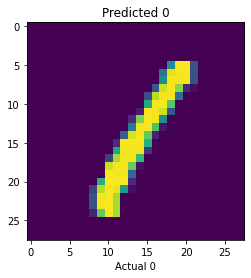

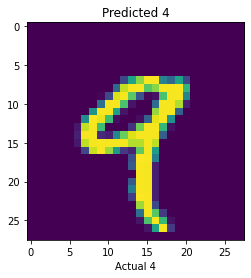

In [16]:
for i in range(5):
  plt.imshow(train_image[i])
  plt.xlabel("Actual "+str(test_label[i]))
  plt.title("Predicted "+str(np.argmax(predictions[i])))
  plt.show()



In [17]:
# Save model
model.save("Digit_Recogniser.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Digit_Recogniser.model/assets


In [18]:
new_model=keras.models.load_model("Digit_Recogniser.model")

In [19]:
new_model.predict(ctest_image)
# ctest_image[0].shape

array([[2.1587664e-06, 1.5075923e-08, 6.2171581e-05, ..., 9.9990761e-01,
        7.5302729e-08, 1.1957184e-06],
       [6.6518935e-10, 9.3232657e-06, 9.9999011e-01, ..., 7.2388052e-14,
        1.6935449e-07, 1.8988209e-15],
       [1.7903885e-07, 9.9875295e-01, 7.2265253e-04, ..., 1.4658080e-04,
        2.7665062e-04, 2.1944427e-06],
       ...,
       [3.2187428e-14, 2.0750484e-13, 3.0334987e-13, ..., 1.0687988e-07,
        5.5204288e-07, 1.5451987e-07],
       [1.2554049e-08, 4.8123194e-09, 3.4628908e-10, ..., 2.5060746e-08,
        1.0548595e-03, 4.7511650e-10],
       [6.1677126e-09, 1.3039415e-10, 1.4664279e-07, ..., 4.0126394e-14,
        6.8758677e-10, 4.6913654e-11]], dtype=float32)

In [21]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
# def load_dataset():
# 	# load dataset
# 	(trainX, trainY), (testX, testY) = mnist.load_data()
# 	# reshape dataset to have a single channel
# 	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
# 	testX = testX.reshape((testX.shape[0], 28, 28, 1))
# 	# one hot encode target values
# 	trainY = to_categorical(trainY)
# 	testY = to_categorical(testY)
# 	return trainX, trainY, testX, testY

# # scale pixels
# def prep_pixels(train, test):
# 	# convert from integers to floats
# 	train_norm = train.astype('float32')
# 	test_norm = test.astype('float32')
# 	# normalize to range 0-1
# 	train_norm = train_norm / 255.0
# 	test_norm = test_norm / 255.0
# 	# return normalized images
# 	return train_norm, test_norm

# # define cnn model
# def define_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Flatten())
# 	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dense(10, activation='softmax'))
# 	# compile model
# 	opt = SGD(lr=0.01, momentum=0.9)
# 	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# 	return model

# # evaluate a model using k-fold cross-validation
# def evaluate_model(dataX, dataY, n_folds=5):
# 	scores, histories = list(), list()
# 	# prepare cross validation
# 	kfold = KFold(n_folds, shuffle=True, random_state=1)
# 	# enumerate splits
# 	for train_ix, test_ix in kfold.split(dataX):
# 		# define model
# 		model = define_model()
# 		# select rows for train and test
# 		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
# 		# fit model
# 		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
# 		# evaluate model
# 		_, acc = model.evaluate(testX, testY, verbose=0)
# 		print('> %.3f' % (acc * 100.0))
# 		# stores scores
# 		scores.append(acc)
# 		histories.append(history)
# 	return scores, histories

# # plot diagnostic learning curves
# def summarize_diagnostics(histories):
# 	for i in range(len(histories)):
# 		# plot loss
# 		pyplot.subplot(2, 1, 1)
# 		pyplot.title('Cross Entropy Loss')
# 		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
# 		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
# 		# plot accuracy
# 		pyplot.subplot(2, 1, 2)
# 		pyplot.title('Classification Accuracy')
# 		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
# 		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
# 	pyplot.show()

# # summarize model performance
# def summarize_performance(scores):
# 	# print summary
# 	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# 	# box and whisker plots of results
# 	pyplot.boxplot(scores)
# 	pyplot.show()

# # run the test harness for evaluating a model
# def run_test_harness():
# 	# load dataset
# 	trainX, trainY, testX, testY = load_dataset()
# 	# prepare pixel data
# 	trainX, testX = prep_pixels(trainX, testX)
# 	# evaluate model
# 	scores, histories = evaluate_model(trainX, trainY)
# 	# learning curves
# 	summarize_diagnostics(histories)
# 	# summarize estimated performance
# 	summarize_performance(scores)

# # entry point, run the test harness
# run_test_harness()

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [23]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [25]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


In [27]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [29]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [31]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [32]:
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [34]:
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

> 98.542
> 98.642
> 98.567
> 98.908
> 98.592


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


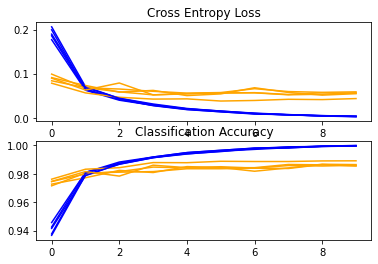

Accuracy: mean=98.650 std=0.133, n=5


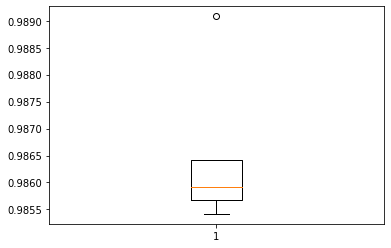

In [35]:
run_test_harness()

[Look at this kernel. Confusion matrix, augmentation, annealer](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)